In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
# test_y = pd.read_csv("Y.csv")
# train
# test

In [3]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213353 entries, 99874 to 121958
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            213353 non-null  int64  
 1   Hospital_code                      213353 non-null  int64  
 2   Hospital_type_code                 213353 non-null  object 
 3   City_Code_Hospital                 213353 non-null  int64  
 4   Hospital_region_code               213353 non-null  object 
 5   Available Extra Rooms in Hospital  213353 non-null  int64  
 6   Department                         213353 non-null  object 
 7   Ward_Type                          213353 non-null  object 
 8   Ward_Facility_Code                 213353 non-null  object 
 9   Bed Grade                          213276 non-null  float64
 10  patientid                          213353 non-null  int64  
 11  City_Code_Patient                  

In [5]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(df.drop(['Stay'],axis=1), df.Stay, test_size=0.33 ,random_state=42)
train=pd.concat([train_x,train_y],axis=1)
print(train)
test = test_x

        case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
99874     99875             26                  b                   2   
169855   169856              2                  c                   5   
141236   141237             28                  b                  11   
266640   266641             28                  b                  11   
154872   154873             32                  f                   9   
...         ...            ...                ...                 ...   
119879   119880             11                  b                   2   
259178   259179             15                  c                   5   
131932   131933             23                  a                   6   
146867   146868             15                  c                   5   
121958   121959             17                  e                   1   

       Hospital_region_code  Available Extra Rooms in Hospital    Department  \
99874                     Y                

In [7]:
for col in train.columns:
    print("==================================")
    print(col)
    print(train[col].unique())

case_id
[ 99875 169856 141237 ... 131933 146868 121959]
Hospital_code
[26  2 28 32 14 19 23 27 25  5 15 30 11 12 10 18 24  6  1 29 21  8 31  9
 17  3 13 16  4  7 20 22]
Hospital_type_code
['b' 'c' 'f' 'a' 'e' 'd' 'g']
City_Code_Hospital
[ 2  5 11  9  1  7  6  3 13 10  4]
Hospital_region_code
['Y' 'Z' 'X']
Available Extra Rooms in Hospital
[ 4  2  3  5  6  1  7  8 10  9 12  0 13 11 21 20 14]
Department
['gynecology' 'radiotherapy' 'anesthesia' 'TB & Chest disease' 'surgery']
Ward_Type
['Q' 'S' 'R' 'T' 'P' 'U']
Ward_Facility_Code
['D' 'F' 'B' 'E' 'C' 'A']
Bed Grade
[ 2.  4.  3.  1. nan]
patientid
[ 27049  37371 108777 ...  17121  67594  61635]
City_Code_Patient
[ 8.  1.  9. 10.  2. 16.  4. 18.  7. 23.  5.  6. 15. 13. 19.  3. nan 25.
 22. 28. 12. 21. 27. 26. 11. 20. 14. 38. 24. 33. 32. 31. 34. 30. 29. 37.
 35. 36.]
Type of Admission
['Emergency' 'Trauma' 'Urgent']
Severity of Illness
['Moderate' 'Minor' 'Extreme']
Visitors with Patient
[ 3  2  8  4  6  5 12 17  9 10 14 30  7  1 16 23 18 1

In [8]:
## checking null
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              77
patientid                               0
City_Code_Patient                    3039
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

## Data Processsing 

In [9]:
train = train.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)
test = test.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)


In [10]:
# Combine test and train dataset for processing
combined = [train, test]

## Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

for dataset in combined:
    label = LabelEncoder()
    dataset['Department'] = label.fit_transform(dataset['Department'])

In [12]:
combined[1].Department.unique()

array([2, 0, 1, 3, 4])

In [13]:
for dataset in combined:
    label = LabelEncoder()
#     dataset[['Hospital_type_code']]
    dataset['Hospital_type_code'] = label.fit_transform(dataset['Hospital_type_code'])
    dataset['Ward_Facility_Code'] = label.fit_transform(dataset['Ward_Facility_Code'])
    dataset['Ward_Type'] = label.fit_transform(dataset['Ward_Type'])
    dataset['Type of Admission'] = label.fit_transform(dataset['Type of Admission'])
    dataset['Severity of Illness'] = label.fit_transform(dataset['Severity of Illness'])

In [14]:
combined

[        case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
 99874     99875             26                   1                   2   
 169855   169856              2                   2                   5   
 141236   141237             28                   1                  11   
 266640   266641             28                   1                  11   
 154872   154873             32                   5                   9   
 ...         ...            ...                 ...                 ...   
 119879   119880             11                   1                   2   
 259178   259179             15                   2                   5   
 131932   131933             23                   0                   6   
 146867   146868             15                   2                   5   
 121958   121959             17                   4                   1   
 
         Available Extra Rooms in Hospital  Department  Ward_Type  \
 99874                       

In [15]:
age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

In [16]:
for dataset in combined:
    dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())

In [17]:
stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}

In [18]:
combined[0]['Stay'] = combined[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())

<AxesSubplot:>

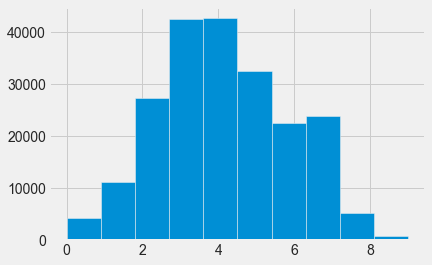

In [19]:
combined[0].Age.hist()

<AxesSubplot:>

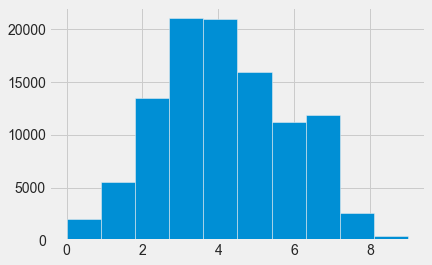

In [20]:
combined[1].Age.hist()

In [21]:
combined[0].to_csv("final_train.csv")

In [22]:
combined[1].to_csv("final_test.csv")

### Model Developement

<AxesSubplot:>

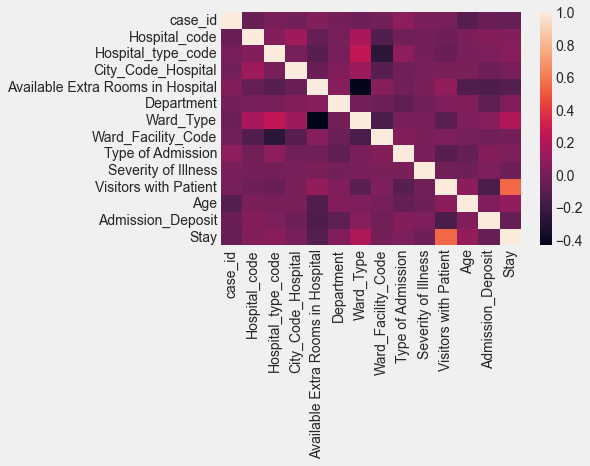

In [23]:
sns.heatmap(combined[0].corr())

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
train = combined[0]
test = combined[1]

In [26]:
sample

NameError: name 'sample' is not defined

In [27]:
X_train = train.drop([ 'Stay'], axis=1)
Y_train = train["Stay"]
X_test  = test
X_train.shape, Y_train.shape, X_test.shape

((213353, 13), (213353,), (105085, 13))

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
        
knn.fit(X_train.iloc[:,[1,2,3,4,5]], Y_train)
Y_pred = knn.predict(X_test.iloc[:,[1,2,3,4,5]])
acc_knn = round(knn.score(X_train.iloc[:,[1,2,3,4,5]], Y_train) * 100, 2)
acc_knn

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,knn.predict(X_train.iloc[:,[1,2,3,4,5]])))
#test_y['Stay'] = test_y['Stay'].replace(stay_dict.keys(), stay_dict.values())

In [ ]:
#print(test_y.Stay.unique())

In [ ]:
from sklearn.metrics import confusion_matrix
# test_y = pd.read_csv(d"C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\1st Sem\\CMSE 830  introduction to data science\\Mid Project\\Intro_to_datascience-_CMSE\\test_y.csv")
print(confusion_matrix(Y_train,knn.predict(X_train.iloc[:,[1,2,3,4,5]])))


In [ ]:
sns.heatmap(confusion_matrix(Y_train,knn.predict(X_train.iloc[:,[1,2,3,4,5]])))

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train.iloc[:,[1,2,3,4,5,7,8]], Y_train)
Y_pred = decision_tree.predict(X_test.iloc[:,[1,2,3,4,5,7,8]])
acc_decision_tree = round(decision_tree.score(X_train.iloc[:,[1,2,3,4,5,7,8]], Y_train) * 100, 2)
print(acc_decision_tree)
test_acc_decision_tree = round(decision_tree.score(X_test.iloc[:,[1,2,3,4,5,7,8]], test_y) * 100, 2)

In [ ]:
from sklearn.metrics import accuracy_score
test_pred = decision_tree.predict(X_test.iloc[:,[1,2,3,4,5,7,8]])

print(accuracy_score(np.array(test_y.replace(stay_dict.keys(), stay_dict.values())), test_pred))


In [ ]:
from sklearn import svm

In [ ]:
svm_model = svm.SVC()

In [ ]:
# svm_model.fit(X_train.iloc[:,[1,2,3,4,5,7,8]], Y_train)
# Y_pred = svc_model.predict(X_test.iloc[:,[1,2,3,4,5,7,8]])
# acc_svc_model = round(svc_model.score(X_train.iloc[:,[1,2,3,4,5,7,8]], Y_train) * 100, 2)
# print(acc_svc_model)
# test_acc_svc_model = round(svc_model.score(X_test.iloc[:,[1,2,3,4,5,7,8]], test_y) * 100, 2)

In [32]:
from sklearn.linear_model import SGDClassifier
SCG_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SCG_classifier.fit(X_train.iloc[:,[1,2,3,7,8]], Y_train)
Y_pred = SCG_classifier.predict(X_test.iloc[:,[1,2,3,7,8]])
acc_SCG_classifier = round(SCG_classifier.score(X_train.iloc[:,[1,2,3,7,8]], Y_train) * 100, 2)
print(acc_SCG_classifier)
test_acc_SCG_classifier = round(SCG_classifier.score(X_test.iloc[:,[1,2,3,7,8]], test_y) * 100, 2)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


24.69
